## Project: Writing a Data Science blog post about Airbnbs in Seattle.
Blog post title: What can we learn from Seattle’s Airbnbs?: A short analysis on prices, locations, stakeholders and review scores

### Section 1: Business Understanding

This project deals with Airbnb data from Seattle to understand the pricing, reviewing, and behavior of booking stakeholders.
Seattle as a thriving town on the US west coast, where worldwide trends arise, may be exemplary for places with a high dynamics of Airbnb offers and demands.
The following three business questions are aimed to be answered in this notebook.

**1. Where can we expect large deviations in an accommodation's price from its listing price?**

**2. Is there a relationship between a host's response rate and their accommodation's review score?**

**3. Correlates the reviewer gender ratio with the host's gender and accommodation's review score?**

### Packages

In this code cell, all necessary packages are imported.

In [1]:
# packages
import pandas as pd
import numpy as np
import requests
import zipfile
import matplotlib.pyplot as plt
import matplotlib
import geopandas
import math
import gender_guesser.detector as gender

### Section 2: Data understanding

#### Gather data

Download geographical data of neighbourhood shapes and extract it into the "data" folder.
This data is used for visualisation of Airbnb homes within Seattle and helps to identify the neighbourhood each home lies in.

In [2]:
# download neighbourhoods as shape files as zip archive

url = 'https://opendata.arcgis.com/api/v3/datasets/b76cdd45f7b54f2a96c5e97f2dda3408_2/downloads/data?format=shp&spatialRefId=4326&where=1%3D1'
r = requests.get(url, allow_redirects=True)
archiv_file_neighbourhoods="data/neighbourhoods.zip"
open(archiv_file_neighbourhoods, 'wb').write(r.content)

# extract neighbourhood zip file into shapefiles

extr_folder="data"  # extraction folder
with zipfile.ZipFile(archiv_file_neighbourhoods, 'r') as zip_ref:
    zip_ref.extractall(extr_folder)

Load Airbnb data about listings, reviewers, and calendar availability into dataframes .
This data is the primary source of information and can be found at https://www.kaggle.com/datasets/airbnb/seattle (the zipped csv files should be extracted into the "data" folder).

In [3]:
# load csv files into dataframes

cal=pd.read_csv("data/calendar.csv")  # load availability and actual price data from 04th of Jan. 2016 to the 3rd of January 2017
lis=pd.read_csv("data/listings.csv")  # load listings
rev=pd.read_csv("data/reviews.csv")   # load reviews from customers

#### Assess and preview data

All the survey source data, which is already loaded into dataframes, is previewed subsequently in upcoming blocks to get an idea of categories and content.

In [4]:
# print shape and preview of "cal" dataframe - availability and actual price data

print("\"calendar.csv\" (shape: ",cal.shape,"):")
cal.head(5)

"calendar.csv" (shape:  (1393570, 4) ):


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
# print shape and preview all columns of "lis" dataframe - listings data

pd.set_option('display.max_columns', None)
print("\"listings.csv\" (shape: ",lis.shape,"):")
lis.head(5)

"listings.csv" (shape:  (3818, 92) ):


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [6]:
# print shape and preview of "rev" dataframe - reviews from customers data

print("\"reviews.csv\" (shape: ",rev.shape,"):")
rev.head(5)

"reviews.csv" (shape:  (84849, 6) ):


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Section 3: Prepare data

#### Define smaller dataframes

In the next code block, the dataframe "cal" containing the available or real prices by each day and the dataframe "lis" containing the listing prices are "inner"-joined with respect to the "listing_id"'s. The resulting dataframe "cal_lis" allows for a direct comparison of the aforementioned prices for each day and each Airbnb accommodation (used later for question 1). 

In [7]:
# define new dataframe "cal_lis" as a merge of "cal" and "lis"
cal_lis=pd.merge(cal[['listing_id','price']],lis[['id','price', 'neighbourhood', 'latitude', 'longitude','host_response_rate','review_scores_value']],how='inner',left_on='listing_id',right_on='id')

In the next code block, a new dataframe "lis_simple" is defined which extracts the host response rate and review scores from the "lis" dataframe.
This new dataframe is created in order to easily handle an analysis covering solely these attributes (used later for question 2).

In [8]:
# copy "lis" but use only 'host_response_rate' and 'review_scores_value'
lis_simple=lis[['host_response_rate','review_scores_value']].copy()

In the next code block, the dataframe "rev" containing the reviews data like reviewer name, .. and the dataframe "lis" containing the information of the Airbnb listings like review score, room type, ... are "inner"-joined with respect to the listing-ids. The resulting dataframe "rev_lis" allows e.g., for a comparison of host and reviewer names (used later for question 3).

In [9]:
# define new dataframe "rev_lis" as a merge of "rev" and "lis"
rev_lis=pd.merge(rev,lis,how='inner',left_on='listing_id',right_on='id')[['listing_id','host_name','reviewer_name', 'room_type','review_scores_value']]

#### Enrich data with extracted information

Enrich the dataframe "rev_lis" with the host's and reviewer's gender with the help of the "gender_guesser" package (used later for question 3).

In [10]:
# initialize gender_gueser_object
d = gender.Detector()

# add gender attributes in "rev_list" for host and reviewer
rev_lis['reviewer_gender']=rev_lis['reviewer_name'].apply(d.get_gender)
rev_lis['host_gender']=rev_lis['host_name'].apply(d.get_gender)

#### Clean data

The dataframe "cal_lis" possesses the columns "price_x" and "price_y", which represent the listing price taken from "lis.price" and the available price taken from "cal.price", respectively.
These prices both start with a $-sign which is removed in the next step. Nan values remain Nan values after this step.
Finally, these columns are renamed (via add and drop) into "listing_price" and "available_price" respectively.

In [11]:
def rm_leading_char(x): 
    """introduced to remove a leading $ sign; also removes a comma"""
    try:
        return float(x.replace(",","")[1:])
    except:
        return np.NAN

# data cleaning: cal_lis.price_y -> cal_lis.listing_price   and   cal.price_x -> cal_lis.available_price
cal_lis['listing_price']=cal_lis.price_y.apply(rm_leading_char)   # new attribut where first character-which is a $-sign- is removed
cal_lis.drop(columns=['price_y'],inplace=True)
cal_lis['available_price']=cal_lis.price_x.apply(rm_leading_char) # new attribut where first character-which is a $-sign- is removed
cal_lis.drop(columns=['price_x'],inplace=True)

The dataframe "lis_simple" possesses the column "host_response_rate", which represents the rate a host responses in percent taken from "lis.host_response_rate".
This attribute ends with a "%" which is removed in the next step. Nan values remain Nan values after this step.
Finally, the column is renamed (via add and drop) into "host_response_rate_num". In addition, a rounded version of this attribute is added wich is needed later for visualisation.

In [12]:

# functions for cleaning data attributes are defined in the following

def rm_trailing_char(x): 
    """introduced to remove trailing % sign; also removes a comma"""
    try:
        return float(x.replace(",","")[:-1])
    except:
        return np.NAN
    
def floor_consider_nan(x): 
    """introduced to "floor" float values but keep a Nan value"""
    try:
        return math.floor(x)
    except:
        return np.NAN


# create simple list and thereby change host response rate into numerical values

lis_simple['host_response_rate_num']=lis_simple['host_response_rate'].apply(rm_trailing_char)
lis_simple['host_response_rate_num_rounded']=10*(lis_simple['host_response_rate_num']/10).apply(floor_consider_nan)
lis_simple.drop(columns=['host_response_rate'],inplace=True)




In the following cell, rows with at least one Nan value in "lis_simple" are removed. This is okay because in the forthcoming investigation, we are only interested in numerical pair configurations of the two attributes "host_response_rate_num" and "review_scores_value" that comprise the dataframe.

In [13]:
lis_simple.dropna(inplace=True,axis=0)

### Section 4: Evaluation

#### Question 1: Where can we expect large deviations in an accommodation's price from its listing price?

##### Analyse

For each Airbnb accommodation, there is a listing price provided.
However, the available price fluctuates every day. The price deviation depends on the booking status, season, and more.
The listing price is just an orientation. But is it a good one for each place in Seattle?  

The dataframe "cal_lis" contains relevant data for our question.
In the following a dataframe "prices_per_neighbourhood" is developed aiming to provide the following attributes for each neighbourhood:
* the number of listings
* the average listing price (an average over all accommodations in "lis", i.e. it is irrespective of calendar availability data)
* the typical deviation of listing prices (the average price deviation for each accommodation over a year averaged over all neighbourhoods accommodations)

In [14]:

# determine number of accomodations (listings) per neighbourhood
temp=lis[['neighbourhood']].groupby(['neighbourhood'],as_index=False).value_counts()
temp.rename(columns={"count": "listings"},inplace=True)
listings_per_neighbourhood=temp

# determine average listing price per neighbourhood
temp=cal_lis[['neighbourhood','listing_price']].groupby(['neighbourhood'],as_index=False).mean()
temp.rename(columns={"listing_price": "average listing price"},inplace=True)
avg_listing_price_per_neighbourhood=temp

# determine average daily deviation from each accommodation's listing price averaged over all listings in a neighbourhood
temp=cal_lis[['listing_id','available_price','listing_price', 'neighbourhood']].copy()
temp['deviation_from_listing_price']=temp['available_price']-temp['listing_price']
temp=temp.groupby(['listing_id', 'neighbourhood'],as_index=False).mean()
temp.rename(columns={"deviation_from_listing_price": "avg_deviation_from_accommodations_listing_price"},inplace=True)
temp=temp[["neighbourhood", "avg_deviation_from_accommodations_listing_price"]].groupby(['neighbourhood'],as_index=False).mean()
temp.rename(columns={"avg_deviation_from_accommodations_listing_price": "typical deviation from accommodations\' listing prices"},inplace=True)
price_fluct_per_neighbourhood=temp

# putting all 3 upper dataframes together
temp=pd.merge(listings_per_neighbourhood,avg_listing_price_per_neighbourhood,on="neighbourhood")
prices_per_neighbourhood=pd.merge(temp,price_fluct_per_neighbourhood,on="neighbourhood")

##### Visualise

The dataframe "prices_per_neighbourhood" is shown next (15 rows only) being sorted by the average listing price in descending order.

In [15]:
# show dataframe "price_per_neighbourhood" sorted by "average listing price" in descending order
prices_per_neighbourhood.sort_values(by=['average listing price', "listings"],inplace=True,ascending=False)
prices_per_neighbourhood.reset_index()
prices_per_neighbourhood.iloc[0:15].style.hide(axis="index")

neighbourhood,listings,average listing price,typical deviation from accommodations' listing prices
Fairmount Park,1,370.000000,0.000000
Industrial District,3,245.000000,4.675926
Portage Bay,14,241.428571,10.481521
Westlake,12,197.000000,1.608584
Alki,23,196.652174,14.862521
Montlake,19,195.947368,0.494363
Magnolia,55,176.000000,16.497812
Pike Place Market,39,175.512821,18.685403
Windermere,10,174.700000,53.754500
Queen Anne,187,168.764706,11.063264


The dataframe "prices_per_neighbourhood" is shown next (15 rows only) being sorted by the "typical deviation from accommodations' listing prices" in descending order.

In [16]:

# show dataframe "price_per_neighbourhood" sorted by "typical deviation from accommodations listing price" in descending order
prices_per_neighbourhood.sort_values(by=['typical deviation from accommodations\' listing prices', "listings"],inplace=True,ascending=False)
prices_per_neighbourhood.reset_index()
prices_per_neighbourhood.iloc[0:15].style.hide(axis="index")

neighbourhood,listings,average listing price,typical deviation from accommodations' listing prices
Pike Market,2,92.000000,100.477140
Windermere,10,174.700000,53.754500
Central Business District,81,163.728395,39.767041
Pinehurst,3,138.000000,37.631818
Belltown,204,166.627451,32.376357
Interbay,7,102.000000,20.991399
Pike Place Market,39,175.512821,18.685403
Magnolia,55,176.000000,16.497812
South Lake Union,21,154.142857,14.897705
Alki,23,196.652174,14.862521


So far, it seems that downton areas (Belltown, Pike Place Market, Central Business district) reveal a large positive price fluctuation. But let's go deeper into individual Airbnb homes to visualise our observation.
The next graphics visualises the average deviation in the accommodations' price from their listing prices in positive direction for each given accommodation throughout available days in a year. Hereby, only two different colors are used. If the difference is over 70 $ then it is painted red, otherwise blue. Downtown areas are highlighted in gray.

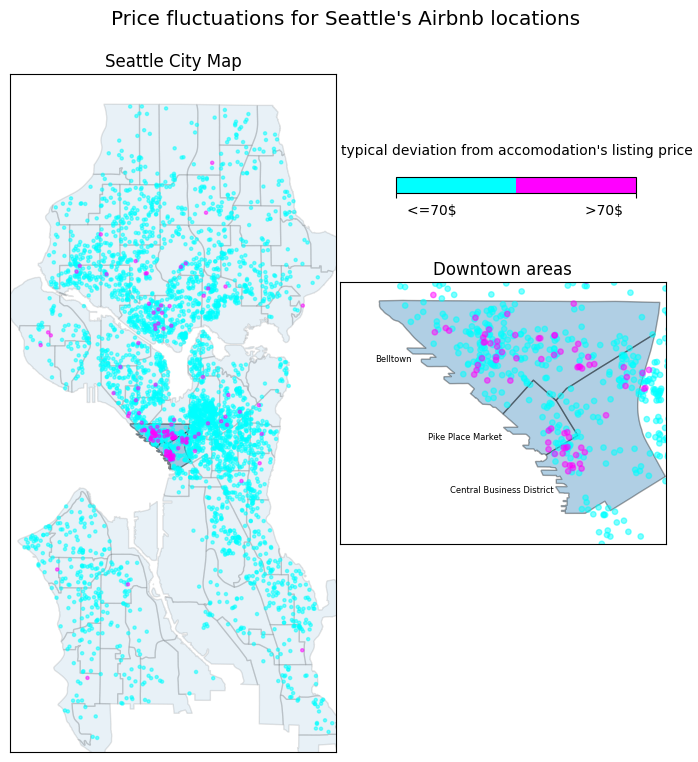

In [17]:

# set threshold for price deviation (average available price - listing price); affects color of Airbnb listings in geographical plot
thresh_value=70

# calculate dataframe "airbnb_plot_items" possessing items for this plot
temp=cal_lis[['listing_id','available_price','listing_price', 'latitude', 'longitude']].copy().groupby(['listing_id','listing_price', 'latitude', 'longitude'],as_index=False).mean()
temp['avg_price_deviation']=temp['available_price']-temp['listing_price']
temp.dropna(subset=['avg_price_deviation'],inplace=True)
temp['color']=temp.avg_price_deviation.apply(lambda x : (x>thresh_value))
temp.sort_values(by=['color'],ascending=True,inplace=True)
airbnb_plot_items=temp

# initialize plot
plt.rcParams['figure.figsize'] = [8,8]
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(left=0.08,right=0.9,bottom=0.05, top=0.9,hspace=-0.32,wspace=0.01)

# title
plt.suptitle('Price fluctuations for Seattle\'s Airbnb locations',fontsize='x-large')

# define color map
N_col=2 # number of discrete colors
cmap = plt.get_cmap('cool', N_col)  # color change defined through "cool" keyword

# create ScalarMappable
norm = matplotlib.colors.Normalize(vmin=0, vmax=1) # defines min and max values of the data that map to min and max values of the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])


# left plot
plt.subplot(121)
plt.title('Seattle City Map',fontsize='large')
ax=ax1

# x,y-range
ax.set_xlim((-122.425,-122.25))  # longitude range
ax.set_ylim((47.5,47.745))       # latitude range
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# load neighbourhoods
nh = geopandas.read_file(r".\data\City_Clerk_Neighborhoods.shx")
nh.plot(ax=ax, alpha=0.1, edgecolor="k")

# load dowtown
dt=nh[(nh.S_HOOD=="Central Business District") | (nh.S_HOOD=="Belltown") | (nh.S_HOOD=="Pike-Market")]
dt.plot(ax=ax, alpha=0.35, edgecolor="k")

# load AirBnb listings
ax.scatter(airbnb_plot_items.longitude,airbnb_plot_items.latitude,c=airbnb_plot_items.color.values,cmap=cmap, alpha=0.5,s=len(airbnb_plot_items.color)*[5])



# right plot
plt.subplot(122)
plt.title('Downtown areas',fontsize='large')
ax = ax2

# x,y-range
ax.set_xlim((-122.365,-122.328)) # longitude range
ax.set_ylim((47.6,47.62))        # latitude range
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# load downtown
dt.plot(ax=ax, alpha=0.35, edgecolor="k")

# annotate neighbourhoods
ax.text(-122.361, 47.614, r'Belltown', fontsize=6)
ax.text(-122.355, 47.608, r'Pike Place Market', fontsize=6)
ax.text(-122.3525, 47.604, r'Central Business District', fontsize=6)

# load AirBnb listings
ax.scatter(airbnb_plot_items.longitude,airbnb_plot_items.latitude,c=airbnb_plot_items.color.values,cmap=cmap, alpha=0.5,s=len(airbnb_plot_items)*[15])

# load color bar
ax3=plt.axes([0.563,0.75,0.3,0.02])
cbar=fig.colorbar(sm, ticks=np.linspace(0, 1, N_col),cax=ax3,orientation='horizontal')
cbar.ax.set_xticklabels(['                <=70$','>70$               '])
cbar.ax.set_xlabel('typical deviation from accomodation\'s listing price', rotation=0,labelpad=-53)

# plot
plt.show()

##### Explanation


Price fluctuations due to seasons, holidays, exhibitions, ... are common.
In dowtown areas, however, the price for the available days is not fluctuating around the listing price. Instead it is fluctuating around more expensive prices.
This might be caused by the clientel comprised e.g. by tourists or business people who prefer this area and are willing to pay a high price since they compare Airbnbs with downtown hotels.

#### Question 2: Is there a relationship between a host's response rate and their accommodation's review score?

##### Analyse

If focusing on the host's response rate, one intuitively would assume that there is a positive correlation with the review scores.
That means the faster the host responses, the higher the review scores. But is it that simple?
Could it be that a fast host response is a consequence of something that has gone wrong with the apartment?

First and for simplicity, the data distribution is analysed along the two dimensions separately.
The analysis involves the calculation of the mean and the standard deviation.

In [18]:
# average review scoes value over all Airbnb listings
avg_review_scores_value=lis_simple[['review_scores_value']].mean()[0]
print("mean review score: ", avg_review_scores_value)

# standard deviation of review score values
std_review_scores_value=lis_simple[['review_scores_value']].std()[0]
print("standard deviation of the review score: ", std_review_scores_value)

# average review scoes value over all Airbnb listings
avg_host_response_rate=lis_simple[['host_response_rate_num']].mean()[0]
print("mean response rate: ", avg_host_response_rate)

# standard deviation of review score values
std_host_response_rate=lis_simple[['host_response_rate_num']].std()[0]
print("standard deviation of the host response rate: ", std_host_response_rate)

mean review score:  9.45374912403644
standard deviation of the review score:  0.7463886378614294
mean response rate:  95.21478626489139
standard deviation of the host response rate:  11.29025238048953


##### Visualise

Next, we look into more detail and determine the distribution or frequency of host response rates in Figure (a).
Furthermore, in Figure (b), the relative frequency of review scores per host response rate (at a 10% bin width) is shown through the point size for each pair constellation. Hereby, the red line represents the average review score per host response rate, and the yellow line visualizes the mean review score (9.45) for all data.

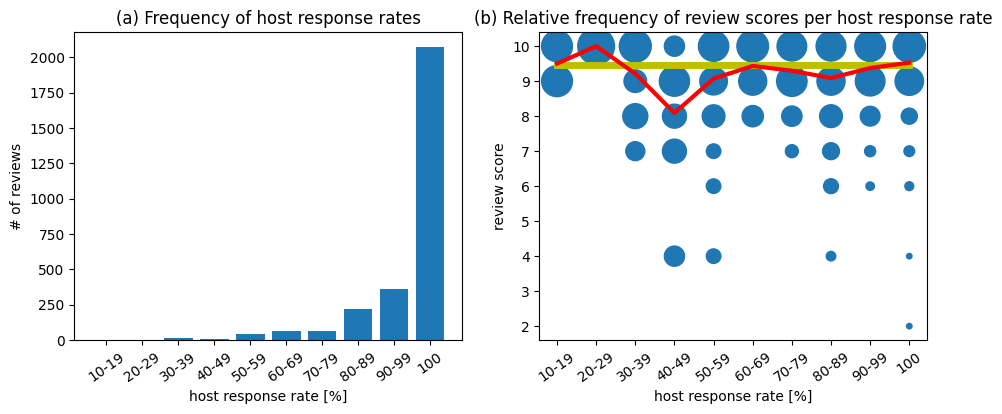

In [19]:
# frequency of each host response rate value at a 10% bin width (Figure (a))
freq_per_host_response_rate=lis_simple[['host_response_rate_num_rounded']].copy().groupby(['host_response_rate_num_rounded'],as_index=False).value_counts(dropna=True).copy()
freq_per_host_response_rate.rename(columns={"count": "counts_per_host_response_rate"},inplace=True)

# frequency of each value pair: (host response rate, review score value)
freq_per_score_and_rate=lis_simple[['host_response_rate_num_rounded','review_scores_value']].groupby(['host_response_rate_num_rounded','review_scores_value'],as_index=False).value_counts(dropna=True).copy()
freq_per_score_and_rate.rename(columns={"count": "counts_per_per_score_and_rate"},inplace=True)

# relative (normalized) frequency of each value pair: (host response rate, review score value)   #  (Figure (b))
# normalization by the frequency of each response rate value
temp=pd.merge(freq_per_score_and_rate,freq_per_host_response_rate,on="host_response_rate_num_rounded")
rel_freq_per_score_and_rate=temp
rel_freq_per_score_and_rate['rel freq per score and rate']=temp["counts_per_per_score_and_rate"]/temp['counts_per_host_response_rate']

# average review scores for each host respose rate at a 10% bin width (red line in Figure (b))
avg_scores_per_rate=lis_simple.groupby(['host_response_rate_num_rounded'],as_index=False).mean().sort_values(by=['host_response_rate_num_rounded'],ascending=True)



# initialize merged plot
plt.rcParams['figure.figsize'] = [11,4]
fig, (ax1, ax2) = plt.subplots(1, 2)


# left plot - histogram of host response rates (10% bin width)
plt.subplot(121)
plt.title("(a) Frequency of host response rates")
plt.xlabel('host response rate [%]')
plt.ylabel('# of reviews')
ax1.set_xticks([10,20,30,40,50,60,70,80,90,100] , labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100'], rotation=35) 
plt.bar(freq_per_host_response_rate.host_response_rate_num_rounded,freq_per_host_response_rate.counts_per_host_response_rate, width=8)# , linestyle = '-', linewidth = '3',color="r")


# right plot - histogram showing relative frequency per score and response rate (10% bin width)
plt.subplot(122)
plt.title("(b) Relative frequency of review scores per host response rate")
plt.xlabel('host response rate [%]')
plt.ylabel('review score')
ax2.set_xticks([10,20,30,40,50,60,70,80,90,100] , labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100'], rotation=35) 
plt.scatter(rel_freq_per_score_and_rate.host_response_rate_num_rounded,rel_freq_per_score_and_rate.review_scores_value ,s=700*np.sqrt(rel_freq_per_score_and_rate['rel freq per score and rate']))

# plot average review score over all given Airbnb listings (yellow line) 
plt.plot(avg_scores_per_rate.host_response_rate_num_rounded,[avg_review_scores_value for i in range(avg_scores_per_rate.host_response_rate_num_rounded.shape[0])], linestyle = '-', linewidth = '5',color="y")

# plot average review scores per host response rate (red line) 
plt.plot(avg_scores_per_rate.host_response_rate_num_rounded,avg_scores_per_rate.review_scores_value, linestyle = '-', linewidth = '3',color="r")



plt.show()

##### Explanation

Hosts normally reply quickly at a host response rate of 95.21% (see also Fig. (a)) and their listings are rated at a high score of 9.45. If they do not reply quickly, it may be reflected in a low review score (see red line for host response rates from 40-50% in Fig. (b)). Cases for which the hosts replies only very slowly do not seem being affected (see red line for host response rates below 40% in Fig. (b)). These might be cases that are primarily not very urgent. However, the statistics at low host response rates is quite weak (see Fig. (a)).

#### Question 3: Correlates the reviewer gender ratio with the host's gender and accommodation's review score?

##### Analyse

It is from a business perspective interesting to take the different behavior of men and women into account.
For this purpose, the female reviewer gender fraction depending on the review score of the accommodation and its host's gender is calculated in the following blocks.

Now, the female gender fraction as a function of review scores and the host's gender is calculated. 

In [20]:
# determine dataframe "female_ratio_male_host" comprising the female ratio of reviewers if the host is male for each Airbnb listing separately (11 reviews are minimum per Airbnb listing); After that the average over the Airbnb listings is taken for each review score.

mm=rev_lis[(rev_lis['host_gender']=="male") & (rev_lis['reviewer_gender']=="male")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
mf=rev_lis[(rev_lis['host_gender']=="male") & (rev_lis['reviewer_gender']=="female")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
temp=pd.merge(mm,mf,on=['listing_id','review_scores_value'])
temp=temp[(temp['count_x']+temp['count_y']>10)] # only take data into account where listings have more than 10 entries
temp['female_ratio']=(temp.count_y)/(temp.count_x+temp.count_y)
female_ratio_male_host=temp[['female_ratio','review_scores_value']].groupby(['review_scores_value'],as_index=False).mean()


# determine dataframe "female_ratio_female_host" comprising the female ratio of reviewers if the host is female for each Airbnb listing separately (11 reviews are minimum per Airbnb listing); After that the average over the Airbnb listings is taken for each review score.

fm=rev_lis[(rev_lis['host_gender']=="female") & (rev_lis['reviewer_gender']=="male")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
ff=rev_lis[(rev_lis['host_gender']=="female") & (rev_lis['reviewer_gender']=="female")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
temp=pd.merge(fm,ff,on=['listing_id','review_scores_value'])
temp=temp[(temp['count_x']+temp['count_y']>10)] # only take data into account where listings have more than 10 entries
temp['female_ratio']=(temp.count_y)/(temp.count_x+temp.count_y)
female_ratio_female_host=temp[['female_ratio','review_scores_value']].groupby(['review_scores_value'],as_index=False).mean()



The upper calculations are done again for private room bookings, which possess more guest-host interference.

In [21]:
# determine dataframe "female_ratio_male_host_private_room" comprising the female ratio of reviewers if the host is male for each private room Airbnb listing separately (11 reviews are minimum per Airbnb listing); After that the average over the Airbnb listings is taken for each review score.

mmp=rev_lis[(rev_lis['room_type']=="Private room") & (rev_lis['host_gender']=="male") & (rev_lis['reviewer_gender']=="male")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
mfp=rev_lis[(rev_lis['room_type']=="Private room") & (rev_lis['host_gender']=="male") & (rev_lis['reviewer_gender']=="female")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
temp=pd.merge(mmp,mfp,on=['listing_id','review_scores_value'])
temp=temp[(temp['count_x']+temp['count_y']>10)] # only take data into account where listings have more than 10 entries
temp['female_ratio']=(temp.count_y)/(temp.count_x+temp.count_y)
female_ratio_male_host_private_room=temp[['female_ratio','review_scores_value']].groupby(['review_scores_value'],as_index=False).mean()


# determine dataframe "female_ratio_female_host_private_room" comprising the female ratio of reviewers if the host is female for each privte room Airbnb listing separately (11 reviews are minimum per Airbnb listing); After that the average over the Airbnb listings is taken for each review score.

fmp=rev_lis[(rev_lis['room_type']=="Private room") & (rev_lis['host_gender']=="female") & (rev_lis['reviewer_gender']=="male")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
ffp=rev_lis[(rev_lis['room_type']=="Private room") & (rev_lis['host_gender']=="female") & (rev_lis['reviewer_gender']=="female")][['listing_id','review_scores_value']].groupby(["listing_id"],as_index=False).value_counts()
temp=pd.merge(fmp,ffp,on=['listing_id','review_scores_value'])
temp=temp[(temp['count_x']+temp['count_y']>10)] # only take data into account where listings have more than 10 entries
temp['female_ratio']=(temp.count_y)/(temp.count_x+temp.count_y)
female_ratio_female_host_private_room=temp[['female_ratio','review_scores_value']].groupby(['review_scores_value'],as_index=False).mean()

##### Visualise

The prior-developed dataframes represent the female reviewer ratio for male and female hosts and for all as well as private bookings.
ThiAll this data is shown together in the upcoming diagram.

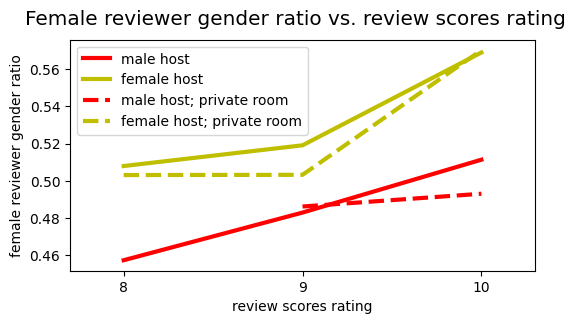

In [22]:
# visualise female gender ratio for different review score values and two different hosts' gender

# initialize plot
plt.rcParams['figure.figsize'] = [6,3]
fig, (ax) = plt.subplots(1, 1)

# plot
plt.subplot(111)
plt.plot(female_ratio_male_host.review_scores_value,female_ratio_male_host.female_ratio, linestyle = '-', linewidth = '3',color="r", label='male host')
plt.plot(female_ratio_female_host.review_scores_value,female_ratio_female_host.female_ratio, linestyle = '-', linewidth = '3',color="y", label='female host')
plt.plot(female_ratio_male_host_private_room.review_scores_value,female_ratio_male_host_private_room.female_ratio, linestyle = '--', linewidth = '3',color="r", label='male host; private room')
plt.plot(female_ratio_female_host_private_room.review_scores_value,female_ratio_female_host_private_room.female_ratio, linestyle = '--', linewidth = '3',color="y", label='female host; private room')

# axes
ax.set_xlim([7.7, 10.3])
ax.set_xticks([8,9,10])
plt.xlabel("review scores rating")
plt.ylabel("female reviewer gender ratio")

plt.legend(loc='upper left')
# major title
plt.suptitle('Female reviewer gender ratio vs. review scores rating',fontsize='x-large')
plt.show()

##### Explanation

Concerning all bookings irrespective of the accommodation type (solid lines), one notes that the ratio of reviewing women is higher, the higher the review scores rating. 
In addition, women acted also more often as reviewers if the host is female. 
However, if the stay is in a private room (dashed lines), then the female reviewer ratio is generally lower. Nonetheless, a review score of 10 was given rather independently of the accommodation type by reviewing women if the host is female. 
Concerning the statistics at low review scores, one can generally recognise that there are not enough reviews provided. Therefore, review scores lower than 8 (or even 9 for male hosts with private room offers) are not represented.